In [ ]:
genai1

In [ ]:
!pip install gensim
import numpy as np
from numpy.linalg import norm
import gensim.downloader as api
# Load pre-trained word vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")  # ~1.5GB model



# Function to perform vector arithmetic and find similar words
def explore_word_relationships(word1, word2, word3):
    try:
        # Get vectors for the input words
        vec1 = word_vectors[word1]
        vec2 = word_vectors[word2]
        vec3 = word_vectors[word3]

        # Perform vector arithmetic: word1 - word2 + word3
        result_vector = vec1 - vec2 + vec3

        # Find the most similar words to the resulting vector
        similar_words = word_vectors.similar_by_vector(result_vector, topn=10)

        # Exclude input words from the results
        input_words = {word1, word2, word3}
        filtered_words = [(word, similarity) for word, similarity in similar_words if word not in input_words]

        print(f"\nWord Relationship: {word1} - {word2} + {word3}")
        print("Most similar words to the result (excluding input words):")
        for word, similarity in filtered_words[:8]:  # Show top 5 results
            print(f"{word}: {similarity:.4f}")

    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")


# Function to analyze the similarity between two words
def analyze_similarity(word1, word2):
    try:
        similarity = word_vectors.similarity(word1, word2)
        print(f"\nSimilarity between '{word1}' and '{word2}': {similarity:.4f}")
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")


# Function to find the most similar words to a given word
def find_most_similar(word):
    try:
        similar_words = word_vectors.most_similar(word, topn=5)
        print(f"\nMost similar words to '{word}':")
        for similar_word, similarity in similar_words:
            print(f"{similar_word}: {similarity:.4f}")
    except KeyError as e:
        print(f"Error: {e} not found in the vocabulary.")

word1 = "king"
word2 = "man"
word3 = "woman"
explore_word_relationships(word1, word2, word3)

Loading pre-trained word vectors...

Word Relationship: king - man + woman
Most similar words to the result (excluding input words):
queen: 0.7301
monarch: 0.6455
princess: 0.6156
crown_prince: 0.5819
prince: 0.5777
kings: 0.5614
sultan: 0.5377
Queen_Consort: 0.5344


In [ ]:
analyze_similarity(word1, "man")
word_vectors[word1].shape
find_most_similar(word1)


Similarity between 'king' and 'man': 0.2294

Most similar words to 'king':
kings: 0.7138
queen: 0.6511
monarch: 0.6413
crown_prince: 0.6204
prince: 0.6160


exp1

In [ ]:
import gensim.downloader as api
from numpy import dot
from numpy.linalg import norm

# Load the pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

# Get word vectors
king_vector = model['king']
man_vector = model['man']
woman_vector = model['woman']

# Perform vector arithmetic (king - man + woman)
result_vector = king_vector - man_vector + woman_vector

# Find the closest word to the result vector
result = model.most_similar([result_vector], topn=1)
print(f"Result of 'king - man + woman': {result[0][0]}")

# Calculate cosine similarity between 'king - man + woman' and 'queen'
queen_vector = model['queen']
cosine_sim = dot(result_vector, queen_vector) / (norm(result_vector) * norm(queen_vector))
print(f"Cosine similarity between 'king - man + woman' and 'queen': {cosine_sim:.4f}")

# Compare with other words
words_to_compare = ['queen', 'king', 'man', 'woman', 'empress']
similarities = {}

for word in words_to_compare:
    word_vector = model[word]
    cosine_sim = dot(result_vector, word_vector) / (norm(result_vector) * norm(word_vector))
    similarities[word] = cosine_sim

print("\nCosine similarities with result vector:")
for word, sim in similarities.items():
    print(f"{word}: {sim:.4f}")


Result of 'king - man + woman': king
Cosine similarity between 'king - man + woman' and 'queen': 0.7301

Cosine similarities with result vector:
queen: 0.7301
king: 0.8449
man: 0.1216
woman: 0.3916
empress: 0.4954


In [ ]:
genai 2a

In [ ]:
!pip install gensim numpy
# Import libraries
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Load pre-trained word vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")  # Load Word2Vec model
# Select 10 words from a specific domain (e.g., technology)
domain_words = ["computer", "software", "hardware", "algorithm", "data", "network",
"programming", "machine", "learning", "artificial"]

# Get vectors for the selected words
domain_vectors = np.array([word_vectors[word] for word in domain_words])
# Function to visualize word embeddings using PCA or t-SNE
def visualize_word_embeddings(words, vectors, method, perplexity=5):
    # Reduce dimensionality to 2D
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=perplexity, max_iter=300)
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")


    # Fit and transform the vectors
    reduced_vectors = reducer.fit_transform(vectors)
    # Plot the results
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], marker='o', color='blue')
        plt.text(reduced_vectors[i, 0] + 0.02, reduced_vectors[i, 1] + 0.02, word, fontsize=12)

    plt.title(f"Word Embeddings Visualization using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(False)
    plt.show()
    # Visualize using PCA in 3D
visualize_word_embeddings(domain_words, domain_vectors, method='pca')
# Visualize using PCA in 3D
visualize_word_embeddings(domain_words, domain_vectors, method='tsne')

Loading pre-trained word vectors...
[==================================================] 100.0% 1662.8/1662.8MB downloaded


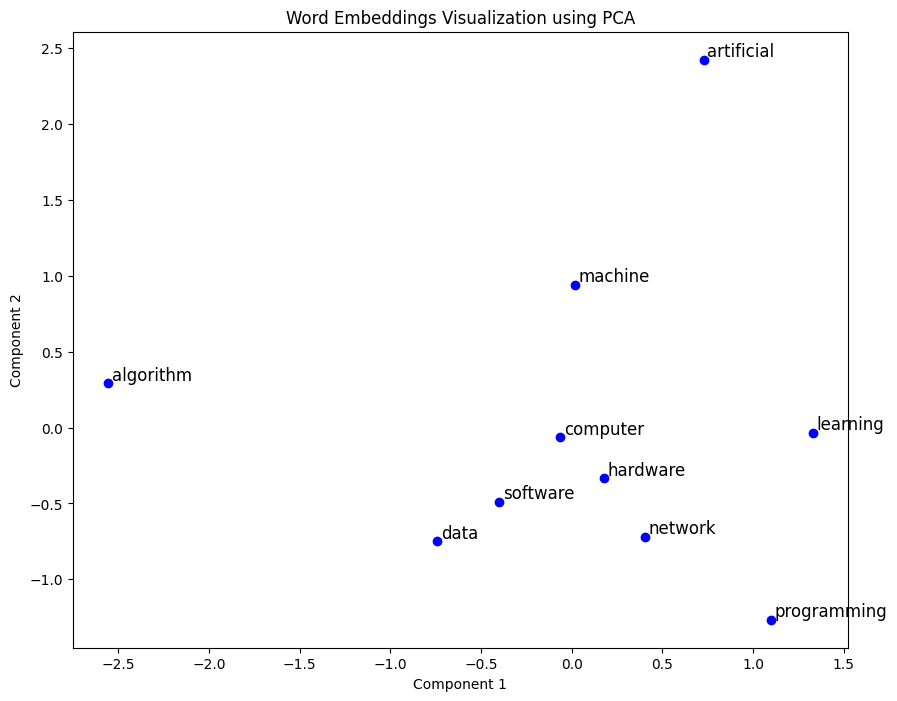

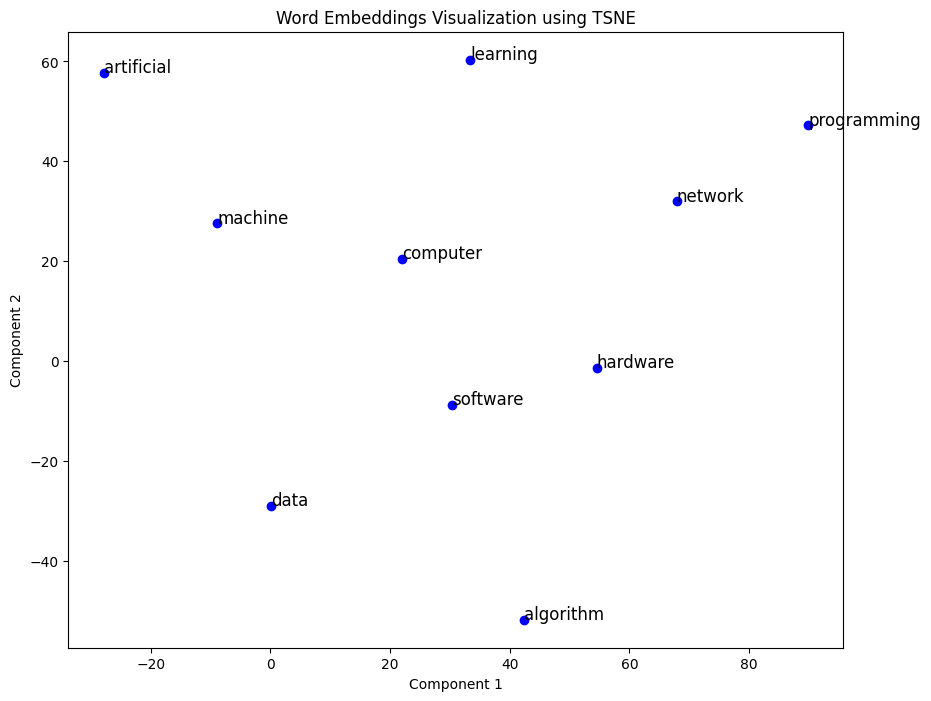

In [ ]:
# Import libraries
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import plotly.express as px

# Load pre-trained word vectors
print("Loading pre-trained word vectors...")
word_vectors = api.load("word2vec-google-news-300")  # Load Word2Vec model

# Select 10 words from a specific domain (e.g., technology)
domain_words = ["computer", "software", "hardware", "algorithm", "data", "network",
"programming", "machine", "learning", "artificial"]

# Get vectors for the selected words
domain_vectors = np.array([word_vectors[word] for word in domain_words])

# Function to visualize word embeddings in 3D using PCA or t-SNE with Plotly
def visualize_word_embeddings_3d(words, vectors, method='pca', perplexity=5):
    # Reduce dimensionality to 3D
    if method == 'pca':
        reducer = PCA(n_components=3)
        title = "3D Word Embeddings Visualization using PCA"
    elif method == 'tsne':
        reducer = TSNE(n_components=3, random_state=42, perplexity=perplexity)
        title = "3D Word Embeddings Visualization using t-SNE"
    else:
        raise ValueError("Method must be 'pca' or 'tsne'.")

    # Fit and transform the vectors
    reduced_vectors = reducer.fit_transform(vectors)

    # Create a 3D scatter plot
    fig = go.Figure()

    # Add each word as a separate point with label
    for i, word in enumerate(words):
        fig.add_trace(go.Scatter3d(
            x=[reduced_vectors[i, 0]],
            y=[reduced_vectors[i, 1]],
            z=[reduced_vectors[i, 2]],
            mode='markers+text',
            marker=dict(
                size=8,
                color=i,  # give each point a different color
                colorscale='Viridis'
            ),
            text=word,
            textposition="top center",
            name=word
        ))

    # Update layout
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='Component 1',
            yaxis_title='Component 2',
            zaxis_title='Component 3'
        ),
        margin=dict(l=0, r=0, b=0, t=30),
        height=800
    )
    fig.show()

# Visualize using PCA in 3D
visualize_word_embeddings_3d(domain_words, domain_vectors, method='pca')

# Visualize using t-SNE in 3D
visualize_word_embeddings_3d(domain_words, domain_vectors, method='tsne', perplexity=3)






Loading pre-trained word vectors...


exp 3

In [ ]:
!pip install gensim==4.3.3 numpy
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

sentences = [
    "This is a legal document about contracts.",
    "The court will review the legal case.",
    "Medical professionals require specific training.",
    "This is a medical report about the patient."
]

tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]
model = Word2Vec(sentences=tokenized_sentences, vector_size=50, window=5, min_count=1, workers=4, epochs=10)
print(model.wv.most_similar('legal'))

[('case', 0.19041602313518524), ('document', 0.045007091015577316), ('contracts', -0.010094511322677135), ('the', -0.014259982854127884), ('report', -0.02316688746213913), ('court', -0.043792981654405594), ('will', -0.044073157012462616), ('review', -0.09419942647218704), ('patient', -0.12276068329811096), ('require', -0.14990590512752533)]


In [ ]:
genai3

Training Word2Vec model...
Model training complete!


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



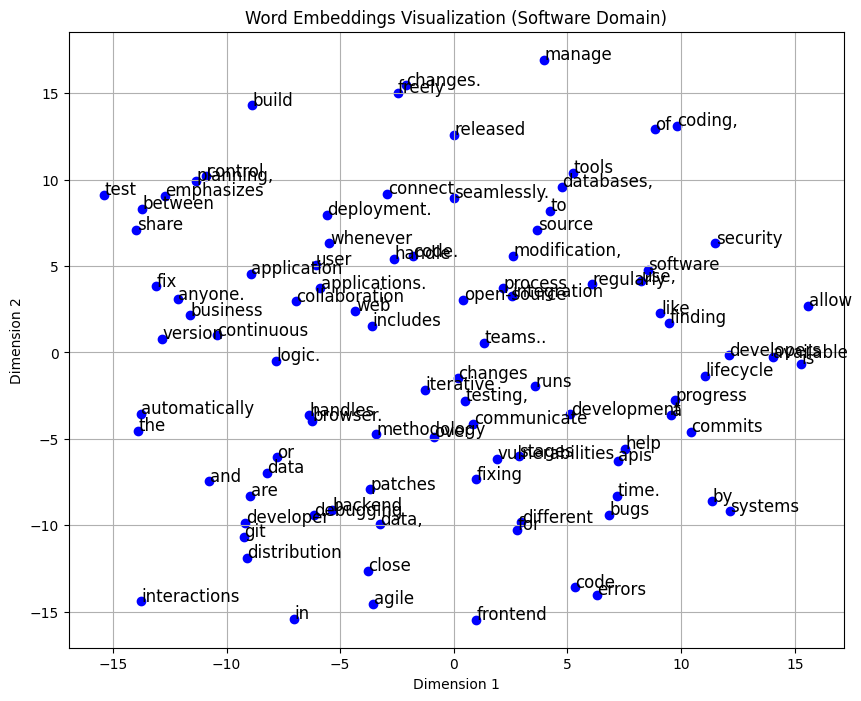

Words similar to 'data':
  or (0.27)
  are (0.24)
  debugging (0.20)
  systems (0.18)
  and (0.17)
Words similar to 'lifecycle':
  progress (0.27)
  developers (0.26)
  to (0.18)
  deployment. (0.16)
  available (0.15)
Words similar to 'user':
  whenever (0.27)
  applications. (0.26)
  interactions (0.23)
  build (0.20)
  teams.. (0.20)


In [ ]:
# Import libraries
!pip install gensim matplotlib scikit-learn numpy
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


import numpy as np

# Sample domain-specific corpus (medical domain)
software_corpus = [
    "The software development lifecycle includes stages like planning, coding, testing, and deployment.",
    "Agile methodology emphasizes iterative progress and close collaboration between teams..",
    "Version control systems like Git help developers manage changes in source code over time.",
    "Continuous integration tools automatically test and build code whenever a developer commits changes.",
    "The frontend of a web application handles user interactions and runs in the browser.",
    "Backend systems process data, connect to databases, and handle business logic.",
    "APIs allow different software systems to communicate and share data seamlessly.",
    "Debugging is the process of finding and fixing errors or bugs in software code.",
    "Security patches are regularly released to fix vulnerabilities in applications.",
    "Open-source software is freely available for use, modification, and distribution by anyone."
]

# Preprocess corpus (tokenize sentences)
processed_corpus = [sentence.lower().split() for sentence in software_corpus]

# Train a Word2Vec model
print("Training Word2Vec model...")
model = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1,
workers=4, epochs=50)
print("Model training complete!")

# Extract embeddings for visualization
words = list(model.wv.index_to_key)
embeddings = np.array([model.wv[word] for word in words])

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=300)
tsne_result = tsne.fit_transform(embeddings)

# Visualization of word embeddings
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], color="blue")
for i, word in enumerate(words):
    plt.text(tsne_result[i, 0] + 0.02, tsne_result[i, 1] + 0.02, word, fontsize=12)
plt.title("Word Embeddings Visualization (Software Domain)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()



# Analyze domain-specific semantics
def find_similar_words(input_word, top_n=5):
    try:
        similar_words = model.wv.most_similar(input_word, topn=top_n)
        print(f"Words similar to '{input_word}':")
        for word, similarity in similar_words:
            print(f"  {word} ({similarity:.2f})")
    except KeyError:
        print(f"'{input_word}' not found in vocabulary.")

# Example: Generate semantically similar words
find_similar_words("data")
find_similar_words("lifecycle")
find_similar_words("user")

exp 4

In [ ]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-50")

def enrich_prompt(prompt, num_similar=3):
    words = prompt.split()
    enriched_words = []
    for word in words:
        try:
            similar_words = [w for w, _ in model.most_similar(word, topn=num_similar)]
            enriched_words.append(word + " (" + ", ".join(similar_words) + ")")
        except KeyError:
            enriched_words.append(word)
    return " ".join(enriched_words)

original_prompt = "Write a story about a Dog."
enriched_prompt = enrich_prompt(original_prompt)

print("Original Prompt:", original_prompt)
print("Enriched Prompt:", enriched_prompt)

[==================================================] 100.0% 66.0/66.0MB downloaded
Original Prompt: Write a story about a Dog.
Enriched Prompt: Write a (another, an, one) story (stories, book, tale) about (than, there, more) a (another, an, one) Dog.


exp 5

In [ ]:
import gensim.downloader as api
import random

model = api.load("glove-wiki-gigaword-50")

def generate_sentence(seed_word, num_words=10):
    """Generates a sentence starting with a seed word."""
    sentence = [seed_word]
    for _ in range(num_words - 1):
        try:
            similar_words = [w for w, _ in model.most_similar(seed_word, topn=5)]
            next_word = random.choice(similar_words)
            sentence.append(next_word)
            seed_word = next_word
        except KeyError:
            break  # Stop if a word is not found
    return " ".join(sentence) + "."

def generate_paragraph(seed_word, num_sentences=3):
  para = ""
  for i in range(num_sentences):
    para = para + generate_sentence(seed_word) + " "
    try:
      similar_words = [w for w, _ in model.most_similar(seed_word, topn=5)]
      seed_word = random.choice(similar_words)
    except:
      break
  return para

# Example usage
seed_word = "travel"
sentence = generate_sentence(seed_word)
print("Generated Sentence:", sentence)
print(generate_paragraph(seed_word, num_sentences=3))

Generated Sentence: travel traveling travelling arriving traveling train bus buses minibuses lorries.
travel trips trip visits visit trip trips tours touring toured. travelers customers consumers buying buyers buying buy purchase sale auction. customers clients private offering offered provided providing provided provide providing. 


exp 6

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentences = [
    "This is a great product! I love it.",
    "I am very disappointed with this service.",
    "The weather is not okay today.but still gotta adjust the place"
]

results = classifier(sentences)
for sentence, result in zip(sentences, results):
    print(f"'{sentence}' -> Label: {result['label']}, Score: {result['score']:.3f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


'This is a great product! I love it.' -> Label: POSITIVE, Score: 1.000
'I am very disappointed with this service.' -> Label: NEGATIVE, Score: 1.000
'The weather is not okay today.but still gotta adjust the place' -> Label: NEGATIVE, Score: 0.990


exp 6

In [ ]:
# Install required libraries (only needed for first-time setup)
!pip install transformers

# Import the sentiment analysis pipeline from Hugging Face
from transformers import pipeline

# Load the sentiment analysis pipeline
print("🔍 Loading Sentiment Analysis Model...")
sentiment_analyzer = pipeline("sentiment-analysis")



# Function to analyze sentiment
def analyze_sentiment(text):
    """
    Analyze the sentiment of a given text input.

    Args:
        text (str): Input sentence or paragraph.

    Returns:
        dict: Sentiment label and confidence score.
    """
    result = sentiment_analyzer(text)[0]  # Get the first result
    label = result['label']  # Sentiment label (POSITIVE/NEGATIVE)
    score = result['score']  # Confidence score

    print(f"\n📝 Input Text: {text}")
    print(f"📊 Sentiment: {label} (Confidence: {score:.4f})\n")

    return result

# Example real-world application: Customer feedback analysis
customer_reviews = [
    "The product is amazing! I love it so much.",
    "I'm very disappointed. The service was terrible.",
    "It was an average experience, nothing special.",
    "Absolutely fantastic quality! Highly recommended.",
    "Not great, but not the worst either."
]



# Analyze sentiment for multiple reviews
print("\n📢 Customer Sentiment Analysis Results:")
for review in customer_reviews:
    analyze_sentiment(review)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


🔍 Loading Sentiment Analysis Model...


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu



📢 Customer Sentiment Analysis Results:

📝 Input Text: The product is amazing! I love it so much.
📊 Sentiment: POSITIVE (Confidence: 0.9999)


📝 Input Text: I'm very disappointed. The service was terrible.
📊 Sentiment: NEGATIVE (Confidence: 0.9998)


📝 Input Text: It was an average experience, nothing special.
📊 Sentiment: NEGATIVE (Confidence: 0.9995)


📝 Input Text: Absolutely fantastic quality! Highly recommended.
📊 Sentiment: POSITIVE (Confidence: 0.9999)


📝 Input Text: Not great, but not the worst either.
📊 Sentiment: NEGATIVE (Confidence: 0.9961)



exp 7

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-6-6")

text = """
Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by humans and animals.
Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals.
Colloquially, the term "artificial intelligence" is often used to describe machines that mimic "cognitive" functions that humans associate with the human mind, such as "learning" and "problem solving".
"""

summary = summarizer(text, max_length=50, min_length=10, do_sample=False)
print(summary[0]['summary_text'])

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/460M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/460M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


Leading AI textbooks define the field as the study of "intelligent agents" "Artificial intelligence" is often used to describe machines that mimic "cognitive" functions that humans associate with the human mind .


exp 7

In [ ]:
# Install required libraries (only needed for first-time setup)
!pip install transformers

# Import the summarization pipeline from Hugging Face
from transformers import pipeline

# Load a more accurate pre-trained summarization model
print("🔍 Loading Summarization Model (BART)...")
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to summarize text with improved accuracy
def summarize_text(text, max_length=None, min_length=None):
    """
    Summarizes a given long text using a pre-trained BART summarization model.



    Args:
        text (str): The input passage to summarize.
        max_length (int): Maximum length of the summary (default: auto-calculated).
        min_length (int): Minimum length of the summary (default: auto-calculated).

    Returns:
        str: The summarized text.
    """
    # Remove unnecessary line breaks
    text = " ".join(text.split())

    # Auto-adjust summary length based on text size
    if not max_length:
        max_length = min(len(text) // 3, 150)  # Summary should be ~1/3rd of input
    if not min_length:
        min_length = max(30, max_length // 3)  # Minimum length should be at least 30

    # Generate the summary
    #summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=True, temperature=0.9, repetition_penalty=1.2)

    # Default Settings
    summary_1 = summarizer(text, max_length=150, min_length=30, do_sample=False)

    # High randomness (Creative output)
    summary_2 = summarizer(text, max_length=150, min_length=30, do_sample=True, temperature=0.9)

    # Conservative approach (More structured)


    summary_3 = summarizer(text, max_length=150, min_length=30, do_sample=False, num_beams=5)

    # Diverse sampling using top-k and top-p
    summary_4 = summarizer(text, max_length=150, min_length=30, do_sample=True, top_k=50, top_p=0.95)

    print("\n📝 Original Text:")
    print(text)
    print("\n📌 Summarized Text:")

    print("Default:", summary_1[0]['summary_text'])
    print("High randomness:", summary_2[0]['summary_text'])
    print("Conservative:", summary_3[0]['summary_text'])
    print("Diverse sampling:", summary_4[0]['summary_text'])

    #summarized_text = summary[0]['summary_text']

    #print("\n📝 Original Text:")
    #print(text)
    #print("\n📌 Summarized Text:")
    #print(summarized_text)

# Example long text passage
long_text = """
Artificial Intelligence (AI) is a rapidly evolving field of computer science focused on
creating intelligent machines
capable of mimicking human cognitive functions such as learning, problem-solving, and
decision-making.

Dept. of CSE, RVITM Gen AI – BAIL657C 75

In recent years, AI has significantly impacted various industries, including healthcare,
finance, education,
and entertainment. AI-powered applications, such as chatbots, self-driving cars, and
recommendation systems,
have transformed the way we interact with technology. Machine learning and deep
learning, subsets of AI,
enable systems to learn from data and improve over time without explicit programming.
However, AI also poses ethical
challenges, such as bias in decision-making and concerns over job displacement. As AI
technology continues to advance,
it is crucial to balance innovation with ethical considerations to ensure its responsible
development and deployment.
"""
# Summarize the passage
#summarized_output = summarize_text(long_text)
summarize_text(long_text)

🔍 Loading Summarization Model (BART)...


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu



📝 Original Text:
Artificial Intelligence (AI) is a rapidly evolving field of computer science focused on creating intelligent machines capable of mimicking human cognitive functions such as learning, problem-solving, and decision-making. Dept. of CSE, RVITM Gen AI – BAIL657C 75 In recent years, AI has significantly impacted various industries, including healthcare, finance, education, and entertainment. AI-powered applications, such as chatbots, self-driving cars, and recommendation systems, have transformed the way we interact with technology. Machine learning and deep learning, subsets of AI, enable systems to learn from data and improve over time without explicit programming. However, AI also poses ethical challenges, such as bias in decision-making and concerns over job displacement. As AI technology continues to advance, it is crucial to balance innovation with ethical considerations to ensure its responsible development and deployment.

📌 Summarized Text:
Default: Artificial Int

exp 8

In [ ]:
# 🚀 Step 1: Install required libraries (Run this only once)
!pip install langchain cohere langchain-community google-colab wikipedia-api

# 🚀 Step 2: Import necessary libraries
import cohere
import getpass
from langchain import PromptTemplate
from langchain.llms import Cohere
# from google.colab import auth
# from google.colab import drive


file_path = "/content/genai.txt"  # Change this to your file path

try:
    with open(file_path, "r", encoding="utf-8") as file:
        text_content = file.read()
    print("✅ File loaded successfully!")

    # 🚀 Step 5: Set Up Cohere API Key
    COHERE_API_KEY = getpass.getpass("duNcdh7cDgza0an74Ap0mUfW5odWmygTm4GOqyaW")

    # 🚀 Step 6: Initialize Cohere Model with LangChain
    cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")

    # 🚀 Step 7: Create a Prompt Template
    template = """
    You are an AI assistant helping to summarize and analyze a text document.
    Here is the document content:

    {text}

    �
    � Summary: - Provide a concise summary of the document.

    �
    � Key Takeaways: - List 3 important points from the text.

    �
    � Sentiment Analysis: - Determine if the sentiment of the document is Positive, Negative, or Neutral.
    """

    prompt_template = PromptTemplate(input_variables=["text"], template=template)

    # 🚀 Step 8: Format the Prompt and Generate Output
    formatted_prompt = prompt_template.format(text=text_content)

    response = cohere_llm.predict(formatted_prompt)

    # 🚀 Step 9: Display the Generated Output
    print("\n📌 **Formatted Output** 📌")
    print(response)


except Exception as e:
    print("❌ Error loading file:", str(e))

✅ File loaded successfully!
duNcdh7cDgza0an74Ap0mUfW5odWmygTm4GOqyaW··········


<ipython-input-9-81dfb47d3b22>:48: LangChainDeprecationWarning: The method `BaseLLM.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = cohere_llm.predict(formatted_prompt)



📌 **Formatted Output** 📌


## Summary:
Generative Artificial Intelligence (GenAI) is a game-changing branch of AI that produces new content, such as text, images, audio, and videos, by learning from pre-existing data. Unlike traditional AI, which primarily analyzes data, GenAI creates original outputs in response to user prompts. This is achieved through advanced machine learning techniques and technologies, such as transformer architectures and generative adversarial networks (GANs), which produce human-like content.

## Key Takeaways:
- Generative AI ushers in a new era of AI capabilities, moving beyond analysis and towards content creation.
- Powered by cutting-edge machine learning techniques, Generative AI is capable of producing content that closely resembles human-made content across various formats. 
- This transformative technology holds promise in numerous applications and industries, ranging from entertainment and creativity to healthcare and automation.

## Sentiment Analy

exp 9

In [ ]:
%pip install wikipedia-api pydantic
%matplotlib inline
# Install required libraries

from pydantic import BaseModel
from typing import List, Optional
import wikipediaapi

class InstitutionDetails(BaseModel):
    founder: Optional[str]
    founded: Optional[str]
    branches: Optional[List[str]]
    number_of_employees: Optional[int]
    summary: Optional[str]

def fetch_institution_details(institution_name: str) -> InstitutionDetails:
    # Define a user-agent as per Wikipedia's policy
    user_agent = "MyJupyterNotebook/1.0 (contact: kelvinprabhu2071@gmail.com)"
    wiki_wiki = wikipediaapi.Wikipedia(user_agent=user_agent, language='en')

    page = wiki_wiki.page(institution_name)

    if not page.exists():


        raise ValueError(f"The page for '{institution_name}' does not exist on Wikipedia.")

    # Initialize variables
    founder = None
    founded = None
    branches = []
    number_of_employees = None

    # Extract summary
    summary = page.summary[:500]  # Limiting summary to 500 characters

    # Extract information from the infobox
    infobox = page.text.split('\n')
    for line in infobox:
        if 'Founder' in line:
            founder = line.split(':')[-1].strip()
        elif 'Founded' in line:
            founded = line.split(':')[-1].strip()
        elif 'Branches' in line:
            branches = [branch.strip() for branch in line.split(':')[-1].split(',')]
        elif 'Number of employees' in line:
            try:
                number_of_employees = int(line.split(':')[-1].strip().replace(',', ''))
            except ValueError:
                number_of_employees = None

    return InstitutionDetails(
        founder=founder,
        founded=founded,


        branches=branches if branches else None,
        number_of_employees=number_of_employees,
        summary=summary
    )

# Import necessary libraries
from IPython.display import display
import ipywidgets as widgets

# Function to display institution details
def display_institution_details(details: InstitutionDetails):
    print(f"Founder: {details.founder or 'N/A'}")
    print(f"Founded: {details.founded or 'N/A'}")
    print(f"Branches: {', '.join(details.branches) if details.branches else 'N/A'}")
    print(f"Number of Employees: {details.number_of_employees or 'N/A'}")
    print(f"Summary: {details.summary or 'N/A'}")

# Function to handle button click
def on_button_click(b):
    institution_name = text_box.value
    try:
        details = fetch_institution_details(institution_name)
        display_institution_details(details)
    except ValueError as e:
        print(e)

# Create input box and button
text_box = widgets.Text(
    value='',


    placeholder='Enter the institution name',
    description='Institution:',
    disabled=False
)
button = widgets.Button(
    description='Fetch Details',
    disabled=False,
    button_style='',
    tooltip='Click to fetch institution details',
    icon='search'
)

# Set up button click event
button.on_click(on_button_click)

# Display input box and button
display(text_box, button)

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=9ba02019e31161c1e49a8c24744eb9743d4b446dea2c6c0990439db09add6bb2
  Stored in directory: /root/.cache/pip/wheels/0b/0f/39/e8214ec038ccd5aeb8c82b957289f2f3ab2251febeae5c2860
Successfully built wikipedia-api


Text(value='', description='Institution:', placeholder='Enter the institution name')

Button(description='Fetch Details', icon='search', style=ButtonStyle(), tooltip='Click to fetch institution de…

The page for 'christ university' does not exist on Wikipedia.
Founder: N/A
Founded: N/A
Branches: N/A
Number of Employees: N/A
Summary: Christ University, earlier known as Christ College, is a private deemed-to-be-university located in Bengaluru, Karnataka, India. On 22 July 2008, It was declared as an institution deemed to be university under section 3 of UGC Act 1956.
Christ is under the management of the priests of the Catholic religious order, Carmelites of Mary Immaculate (CMI), part of Syro Malabar Major Archiepiscopal Church. In 2016, the university was accredited by National Assessment and Accreditation Council with A+ G


exp 10

In [ ]:
# Import necessary libraries
from langchain import PromptTemplate, LLMChain
from langchain.llms import Cohere
from pydantic import BaseModel
from typing import Optional
import wikipediaapi

# Step 1: Set up the Cohere API
import getpass
COHERE_API_KEY = getpass.getpass('Enter your Cohere API Key: ')
cohere_llm = Cohere(cohere_api_key=COHERE_API_KEY, model="command")

# Step 2: Download Indian Penal Code (IPC) summary from Wikipedia
def fetch_ipc_summary():
    user_agent = "IPCChatbot/1.0 (contact: kelvinprabhu2071@gmail.com)"
    wiki_wiki = wikipediaapi.Wikipedia(user_agent=user_agent, language='en')
    page = wiki_wiki.page("Indian Penal Code")

    if not page.exists():
        raise ValueError("The Indian Penal Code page does not exist on Wikipedia.")



    return page.text[:5000]  # Limiting to first 5000 characters for brevity

ipc_content = fetch_ipc_summary()

# Step 3: Define a Pydantic model for structured responses
class IPCResponse(BaseModel):
    section: Optional[str]
    explanation: Optional[str]

# Step 4: Create a prompt template for the chatbot
prompt_template = PromptTemplate(
    input_variables=["question"],
    template="""
    You are a legal assistant chatbot specialized in the Indian Penal Code (IPC).
    Refer to the following IPC document content to answer the user's query:

    {ipc_content}

    User Question: {question}

    Provide a detailed answer, mentioning the relevant section if applicable.
    """
)

# Step 5: Function to interact with the chatbot
def get_ipc_response(question: str) -> IPCResponse:
    formatted_prompt = prompt_template.format(ipc_content=ipc_content, question=question)

    try:
        response = cohere_llm.invoke(formatted_prompt)  # updated from predict() to invoke()
    except Exception as e:
        print(f"LLM Error: {e}")
        return IPCResponse(section=None, explanation="Failed to get a response.")

    # Extract section intelligently
    if "Section" in response:
        section = response.split('Section')[1].split(':')[0].strip()
        explanation = response.split(':', 1)[-1].strip()
        print(f"Extracted Section: {section}")
        print(f"Extracted Explanation: {explanation}")
    else:
        section = None
        explanation = response.strip()
        print("No specific section mentioned in the response.")

    return IPCResponse(section=section, explanation=explanation)



ModuleNotFoundError: No module named 'langchain_community'

In [ ]:
# Step 6: Set up interactive chatbot in Jupyter
from IPython.display import display
import ipywidgets as widgets

# Function to display chatbot responses
def display_response(response: IPCResponse):
    print(f"Section: {response.section if response.section else 'N/A'}")
    print(f"Explanation: {response.explanation}")

# Function to handle user input
def on_button_click(b):
    user_question = text_box.value
    print(f"User: {user_question}")
    try:
        response = get_ipc_response(user_question)
        display_response(response)
    except Exception as e:
        print(f"Error: {e}")



# Create text box and button for user input
text_box = widgets.Text(
    value='',
    placeholder='Ask about the Indian Penal Code',
    description='You:',
    disabled=False
)
button = widgets.Button(
    description='Ask',
    disabled=False,
    button_style='',
    tooltip='Click to ask a question about IPC',
    icon='legal'
)

button.on_click(on_button_click)

# Display the chatbot interface
display(text_box, button)

In [ ]:
# Simple chatbot loop using basic input/output

def display_response(response: IPCResponse):
    print("\n--- Chatbot Response ---")
    print(f"Section: {response.section if response.section else 'N/A'}")
    print(f"Explanation: {response.explanation}\n")

def start_ipc_chatbot():
    print("Welcome to the IPC Legal Assistant Chatbot!")
    print("Type 'exit' to quit.\n")

    while True:
        user_question = input("You: ")
        if user_question.lower() in ['exit', 'quit']:
            print("Goodbye!")
            break
        try:
            response = get_ipc_response(user_question)
            display_response(response)
        except Exception as e:
            print(f"Error: {e}\n")

# Start the chatbot
start_ipc_chatbot()

Welcome to the IPC Legal Assistant Chatbot!
Type 'exit' to quit.

You: Legal Assistant Chatbot
No specific section mentioned in the response.

--- Chatbot Response ---
Section: N/A
Explanation: Here is a detailed response addressing the user's query about the criminal code of India: 
The Indian Penal Code (IPC) was the official criminal code of the Republic of India. It was adopted from the criminal code of British India and remained in force from independence until it was replaced on July 1, 2024, by the Bharatiya Nyaya Sanhita (BNS). It is important to note that the BNS does not repeal the previous penal laws that were in force at the time of its implementation in India. This is due to the possibility that the code may not encompass all offenses and therefore, it is imperative to maintain consistency in penal consequences for all crimes. 

TheIPC was enacted on the recommendations of the first Law Commission of India in 1834, led by Thomas Babington Macaulay. The code came into force